**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
%%pycodestyle
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X = X * 1.
        self.y = np.array(y, dtype=int)
        self.XX = ((X * 1.) ** 2).sum(axis=1)

    def predict(self, X):
        return np.argmax(self.predict_proba(X * 1.), axis=1)

    def predict_proba(self, X):
        val_class = np.unique(self.y).shape[0]
        pred = np.empty((X.shape[0], self.k), dtype=int)
        result = np.empty((X.shape[0], val_class))
        splitter = max(X.shape[0] // 100, 1)
        for i, x in enumerate(np.vsplit(X, splitter)):
            YY = ((x * 1.) ** 2).sum(axis=1)
            xy_dist = x.dot((self.X).T)
            dist_sqr = - 2 * xy_dist + self.XX + YY.reshape(-1, 1)
            dist = np.sqrt(dist_sqr * 1.)
            min_index = np.argsort(dist, axis=1)[:, :self.k]
            min_index_class = self.y[min_index]
            for j, y in enumerate(min_index_class):
                q = np.zeros(val_class)
                qqq = np.bincount(y)
                q[:qqq.shape[0]] = qqq
                result[i * x.shape[0] + j] = q / q.sum(dtype=float)
        return result

    def score(self, X, y):
        y_pred = self.predict(X * 1.)
        return (y_pred == np.array(y, dtype=int)).sum(dtype=float) / y.shape[0] * 1.


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.63 ms, sys: 212 µs, total: 1.84 ms
Wall time: 1.52 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 306 µs, sys: 0 ns, total: 306 µs
Wall time: 236 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.46 ms, sys: 186 µs, total: 1.64 ms
Wall time: 1.35 ms


array([0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 3.62 ms, sys: 8.01 ms, total: 11.6 ms
Wall time: 11.1 ms


array([0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 1.02 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 2.59 ms, total: 2.59 ms
Wall time: 1.66 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

In [14]:
# Задание 3

/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


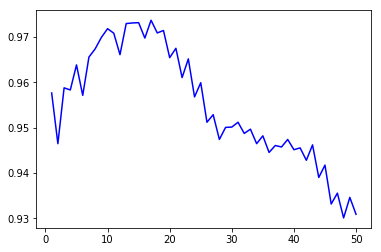

In [15]:
q = np.zeros(50)
neighbors = range(1, 51)
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for j in neighbors:
        my_clf = MyKNeighborsClassifier(n_neighbors=j)
        my_clf.fit(X_train, y_train)
        q[j - 1] += my_clf.score(X_test, y_test)
q /= 1000.
plt.plot(neighbors, q, color='blue')

In [ ]:
#Наблюдается максимум в районе k=18

**MNIST**

In [16]:
mnist = fetch_mldata('MNIST original')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 47.2 s, sys: 142 ms, total: 47.4 s
Wall time: 47.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 273 ms, sys: 296 ms, total: 569 ms
Wall time: 1.28 s


In [21]:
%time clf.predict(X_test)

CPU times: user 12min 24s, sys: 84.1 ms, total: 12min 24s
Wall time: 12min 24s


array([3., 4., 1., ..., 3., 3., 1.])

In [22]:
%time my_clf.predict(X_test)

CPU times: user 1min 42s, sys: 9.01 s, total: 1min 51s
Wall time: 1min 21s


array([3, 4, 1, ..., 3, 3, 1])

In [23]:
%time clf.predict_proba(X_test)

CPU times: user 12min 43s, sys: 104 ms, total: 12min 44s
Wall time: 12min 44s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ]])

In [24]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 33s, sys: 8.7 s, total: 1min 42s
Wall time: 1min 13s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ]])

In [25]:
clf.score(X_test, y_test)

0.9677142857142857

In [21]:
my_clf.score(X_test, y_test)

0.9681428571428572

Задание 5

In [ ]:
# seaborn - для визуализации. Позволяет строить сложные штуки, которые в реализации
# с помощью matplotlib требовали бы много кода


# matplotlib это бибилиотека двумерной графики, с помощью которой можно создавать
# высококачественные рисунки различных форматов.

# train_test_split нужная для случайного разбиения всей обучающей выборки на две части
# заданного размера- на одной мы будем обучаться, а на другой мы будем тестировать модель,
# при этом сможем проверить её качество


# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) нужна для того, чтобы производить
# последовательности каких-то конкретных преобразований, которые мы хотим применить к данным.

# StandardScaler (from sklearn.preprocessing import StandardScaler) нужна для нормализации данных,
# она производит вычитание среднего и деление на стандартное отклонение

# ClassifierMixin миксин-класс для всех классификаторов из scikit-learn. Осуществляет метод score.

# NeighborsBase базовый класс для моделей с концепцией ближайших соседей.


# KNeighborsMixin миксин для KNN поисковиков. Добавляет к базовому классу NeighborsBase функции kneighbors
# для поиска ближайших соседей точки, и kneighbors_graph, которая вычисляет (взвешенный) граф N соседей для
# точек из входных данных


# SupervisedIntegerMixin обучает модель, используя полученные на вход X, как обучающую выборку
# и y, как правильные ответы к этой выборке